<a href="https://colab.research.google.com/github/parasgupta1995/cardioviscular-risk-prediction/blob/main/cardioviscular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("/content/drive/MyDrive/Capstone project/Cardiovascular disease prediction/data_cardiovascular_risk.csv")

In [4]:
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [5]:
#Here in case cardiovasicular risk prediction,the id and education column is not reasons which can effect causes for cardiovasicular risk
#Thus dropping them
data.drop(columns=['id','education'], inplace=True)

In [6]:
data.describe()

age   cigsPerDay       BPMeds  prevalentStroke  prevalentHyp  \
count  3390.000000  3368.000000  3346.000000      3390.000000   3390.000000   
mean     49.542183     9.069477     0.029886         0.006490      0.315339   
std       8.592878    11.879078     0.170299         0.080309      0.464719   
min      32.000000     0.000000     0.000000         0.000000      0.000000   
25%      42.000000     0.000000     0.000000         0.000000      0.000000   
50%      49.000000     0.000000     0.000000         0.000000      0.000000   
75%      56.000000    20.000000     0.000000         0.000000      1.000000   
max      70.000000    70.000000     1.000000         1.000000      1.000000   

          diabetes      totChol       sysBP        diaBP          BMI  \
count  3390.000000  3352.000000  3390.00000  3390.000000  3376.000000   
mean      0.025664   237.074284   132.60118    82.883038    25.794964   
std       0.158153    45.247430    22.29203    12.023581     4.115449   
min       0.000000   107.000000    83.50000    48.000000    15.960000   
25%       0.000000   206.000000   117.00000    74.500000    23.020000   
50%       0.000000   234.000000   128.50000    82.000000    25.380000   
75%       0.000000   264.000000   144.00000    90.000000    28.040000   
max       1.000000   696.000000   295.00000   142.500000    56.800000   

         heartRate      glucose   TenYearCHD  
count  3389.000000  3086.000000  3390.000000  
mean     75.977279    82.086520     0.150737  
std      11.971868    24.244753     0.357846  
min      45.000000    40.000000     0.000000  
25%      68.000000    71.000000     0.000000  
50%      75.000000    78.000000     0.000000  
75%      83.000000    87.000000     0.000000  
max     143.000000   394.000000     1.000000

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 397.4+ KB


### 1. EDA

MULTIVARIANT ANALYSIS

In [8]:
data.drop('TenYearCHD',axis=1).corrwith(data.TenYearCHD).plot(kind='bar',grid=True, figsize=(10,8),
                                                              title='Correlation with TenYearCHD')

<Axes: title={'center': 'Correlation with TenYearCHD'}>

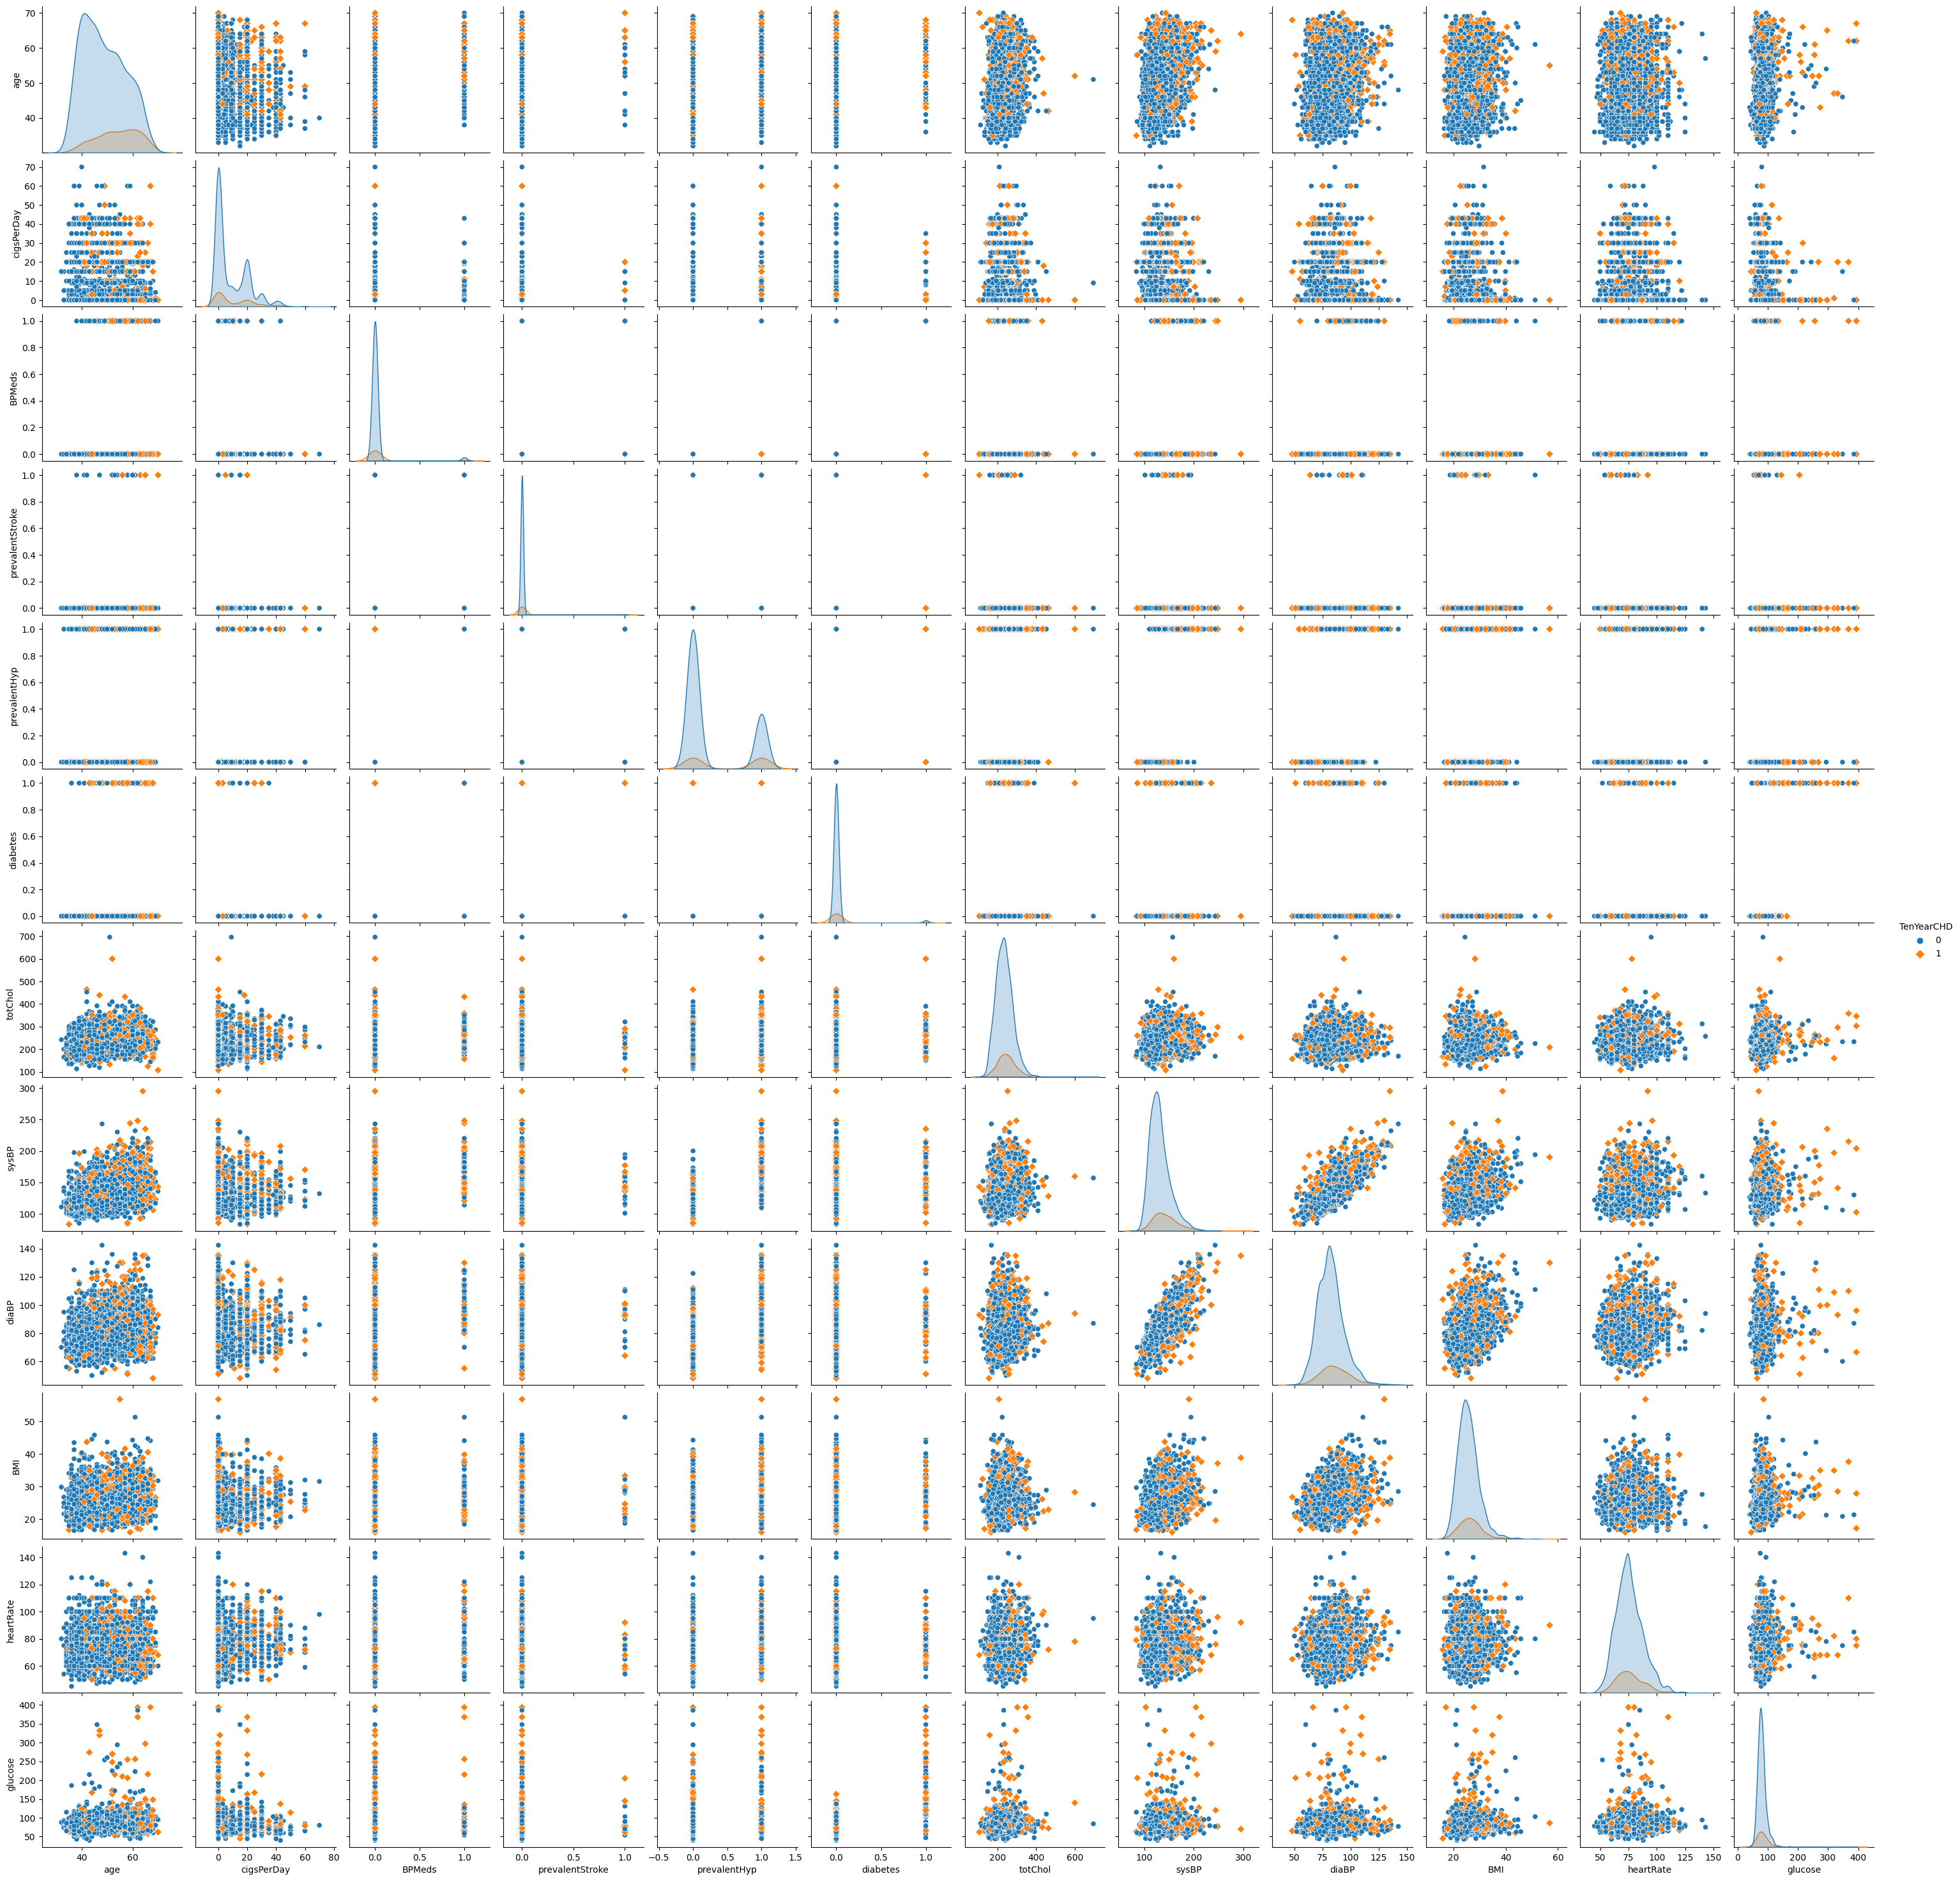

In [9]:
sns.pairplot(data, hue='TenYearCHD', markers=["o", "D"])

Age categories
 

*   Age in range 20-39 then Young-Adults
*   Age in range 40-59 then Middle-Aged Adults
*   Age > 60 senior

cite:https://academic.oup.com/gerontologist/article/42/1/92/641498

In [10]:
# Segregating the people based on their age 
def age_category(age):
  if age<=14:
    age_category='child'

  elif 15<= age <=24:
    age_category='teen' 

  elif 20<= age <=39:
    age_category='Young-Adults'

  elif 40<= age <=59:
    age_category='Middle-Aged Adults' 

  else:
    age_category='senior'

  return age_category 

age_cat=pd.DataFrame(data['age'].apply(lambda x: age_category(x)))
age_cat_CHD=pd.DataFrame(data[data['TenYearCHD']==1]['age'].apply(lambda x: age_category(x)))

* age_cat represent dataframe of total number of people based on age category.
* age_cat_CHD represent dataframe of people suffering from CHD based on age category

In [11]:
age_cat_total=pd.DataFrame(age_cat.value_counts()).reset_index()
age_cat_total.columns=['age_cat','Total number of people']

In [12]:
age_cat_affected_CHD=pd.DataFrame(age_cat_CHD.value_counts()).reset_index()
age_cat_affected_CHD.columns=['age_cat','Affected by CHD']

In [13]:
age_df=pd.concat([age_cat_total,age_cat_affected_CHD['Affected by CHD']],axis=1)

In [14]:
age_df['Percent affected by CHD']=age_df.apply(lambda x: x['Affected by CHD']/x['Total number of people']*100,axis=1)

Text(0.5, 0, 'Age category')

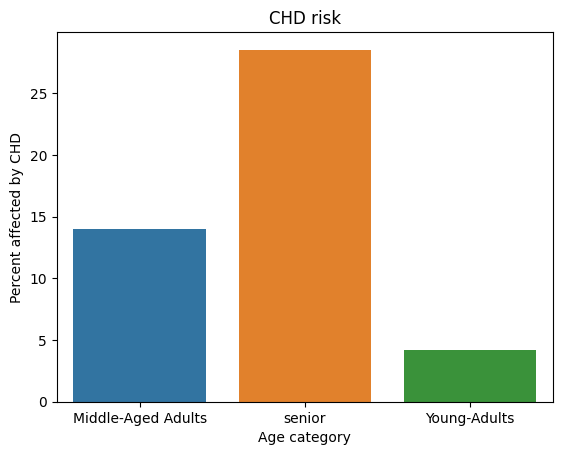

In [15]:
fig,ax=plt.subplots()
ax=sns.barplot(x=age_df['age_cat'],y=age_df['Percent affected by CHD'])
ax.set_title('CHD risk')
ax.set_xlabel('Age category')

CHD is more likely to occur for older people as compare to younger people. 
* Approximately 5 young people had a chance of having CHD in 100 people 
* while 14 middle aged adult in 100 people and 28 people incase of senior.

In [16]:
# Function defined to plot the visual, where data represent dataframe , col represent target column name
# column_name1, column_name2 represent name of column with respect to which we have plot visualization
def plot_visual(data, col,column_name1,column_name2):
  '''Plot visualization of target label with respect column_name1 and column_name_2'''
  data_CHD=data[data[col]==1][[column_name2,column_name1,col]]
  data_1=data_CHD.groupby(by=[column_name1,column_name2]).agg('count').reset_index()
  data_1.columns=[column_name1,column_name2,'count']

  data_2=data[[column_name2,column_name1,col]].groupby(by=[column_name1,column_name2]).agg('count').reset_index()
  data_2.columns=[column_name1,column_name2,'Total count']

  combine_data=pd.concat([data_1,data_2['Total count']],axis=1)
  combine_data['Percent_CHD_risk']=combine_data.apply(lambda x: round(x['count']/x['Total count']*100,2), axis=1)

  # title=input("Title of plot")
  # xlabel=input('x_label name')

  fig,ax=plt.subplots()
  ax=sns.barplot(x=combine_data[column_name2],y=combine_data['Percent_CHD_risk'],hue=combine_data[column_name1])
  # ax.set_title(title)
  # ax.set_xlabel(xlabel,size=12)
  ax.set_ylabel('CHD risk percent',size=12)
  return combine_data


Now based on sex we will find how smoking is influencing the CHD risk on people 

sex is_smoking  count  Total count  Percent_CHD_risk
0   F         NO    147         1147             12.82
1   F        YES     92          776             11.86
2   M         NO     89          556             16.01
3   M        YES    183          911             20.09

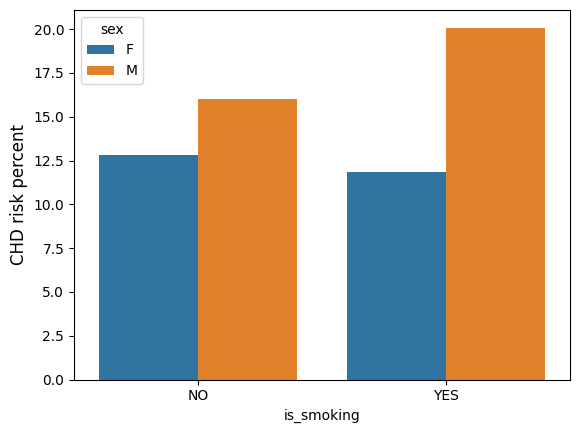

In [17]:
# Visualization is plot based on the sex column, percentage of people who smoke had a cardiovasicular risk
# Title of plot is 'Percent of people who is smoking had a risk of Cardiovasicular disease'
# xlabel is "is_smoking"
plot_visual(data, col='TenYearCHD',column_name1='sex',column_name2='is_smoking')

Now we will determine what percent of people who are suffering from prevalent hypertension having a risk cardioavasicular disease.

In [18]:
# Function that convert prevalent_Hyp in which 0 represent does not suffer with prevalent_Hyp 
# whereas 1 represent suffer from prevalent_Hyp 
def convert(x):
  if x==0:
    x="NO"
  else:
    x='YES'
  return x
data['prevalentHyp_']=data.apply(lambda x: convert(x['prevalentHyp']),axis=1)

In [19]:
plot_visual(data,col='TenYearCHD',column_name1='sex',column_name2='prevalentHyp_')

sex prevalentHyp_  count  Total count  Percent_CHD_risk
0   F            NO    109         1319              8.26
1   F           YES    130          604             21.52
2   M            NO    147         1002             14.67
3   M           YES    125          465             26.88

diabetes

In [20]:
data['diabetes_']=data.apply(lambda x: convert(x['diabetes']),axis=1)

sex diabetes_  count  Total count  Percent_CHD_risk
0   F        NO    224         1876             11.94
1   F       YES     15           47             31.91
2   M        NO    254         1427             17.80
3   M       YES     18           40             45.00

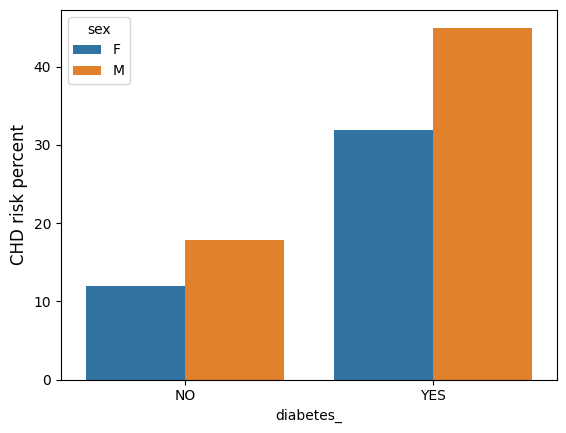

In [21]:
plot_visual(data,col='TenYearCHD',column_name1='sex',column_name2='diabetes_')

Body mass index (BMI) is a person’s weight in kilograms divided by the square of height in meters. BMI is an inexpensive and easy screening method for weight category—underweight, healthy weight, overweight, and obesity.

In general,

* At the same BMI, women tend to have more body fat than men.
* At the same BMI, the amount of body fat may be higher or lower depending on the racial/ethnic group13-15.
* At the same BMI, older people, on average, tend to have more body fat than younger adults.
* At the same BMI, athletes have less body fat than do non-athletes.

Citation: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

**BMI**  |     **Nutritional status**

---



Below 18.5 | Underweight       | 


---


18.5–24.9  |Normal weight     |


---


25.0–29.9  | Pre-obesity       |
                              

---


30.0–34.9  | Obesity class I   |


---


35.0–39.9  | Obesity class II  | 


---


Above 40   | Obesity class III |


---


citation: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations



In [22]:
def BMI_status(x):
  if x<18.5:
    status='underweight'
  
  elif 18.5<= x <24.9:
    status= 'Normal'

  elif 24.9<= x <=29.9:
    status='Pre_obesity'
  
  elif x=='NaN':
    pass
    
  else:
    status='Obesity'
  
  return status

In [23]:
data['BMI_status']=data[['BMI']].apply(lambda x: BMI_status(x['BMI']),axis=1)

sex   BMI_status  count  Total count  Percent_CHD_risk
0   F       Normal     93          966              9.63
1   F      Obesity     51          271             18.82
2   F  Pre_obesity     89          653             13.63
3   F  underweight      6           33             18.18
4   M       Normal     90          516             17.44
5   M      Obesity     45          194             23.20
6   M  Pre_obesity    135          749             18.02
7   M  underweight      2            8             25.00

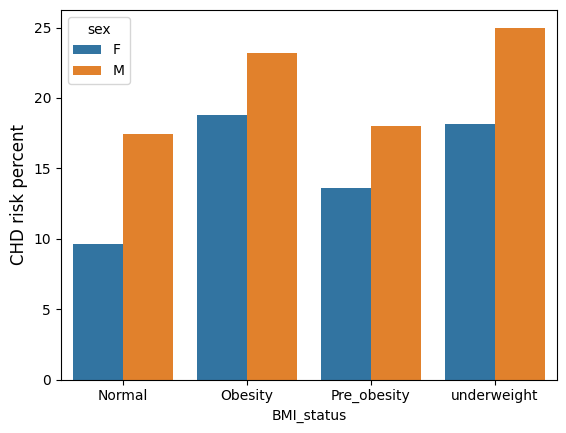

In [24]:
plot_visual(data,col='TenYearCHD',column_name1='sex',column_name2='BMI_status')

Rate: Number of pulsation which could be Bradycardia (<60/minute) or Tachycardia (>100/minute)

In [25]:
def heartrate_class(x):
  if 60<= x <= 100:
    class_='Normal'
  
  elif x < 60:
    class_='Bradycardia'

  else:
    class_='Tachycardia'
  return class_

In [26]:
data['heartrate_class']=data[['heartRate']].apply(lambda x: heartrate_class(x['heartRate']),axis=1)

sex heartrate_class  count  Total count  Percent_CHD_risk
0   F     Bradycardia      5           58              8.62
1   F          Normal    225         1809             12.44
2   F     Tachycardia      9           56             16.07
3   M     Bradycardia     15           96             15.62
4   M          Normal    250         1343             18.62
5   M     Tachycardia      7           28             25.00

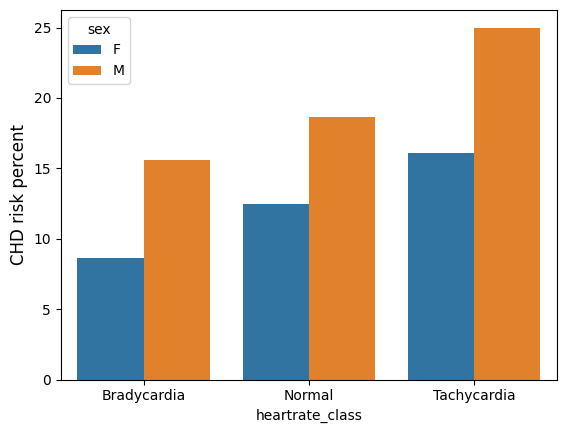

In [27]:
plot_visual(data,col='TenYearCHD',column_name1='sex',column_name2='heartrate_class')

Classification of total cholesterol level
* Good when total cholesterol level are 170 or less	
* Borderline	when total cholesterol level are 170–199	
* High when total cholesterol	level are 200 or higher	


citation:https://www.healthline.com/health/high-cholesterol/levels-by-age#treatment

In [28]:
def totChol_class(x):
  if 170<= x <= 199:
    class_='Borderline'
  
  elif x < 170:
    class_='Good'

  else:
    class_='High'
  return class_

In [29]:
data['totChol_class']=data[['totChol']].apply(lambda x: totChol_class(x['totChol']),axis=1)

sex totChol_class  count  Total count  Percent_CHD_risk
0   F    Borderline     20          280              7.14
1   F          Good     10           91             10.99
2   F          High    209         1552             13.47
3   M    Borderline     26          211             12.32
4   M          Good     11           81             13.58
5   M          High    235         1175             20.00

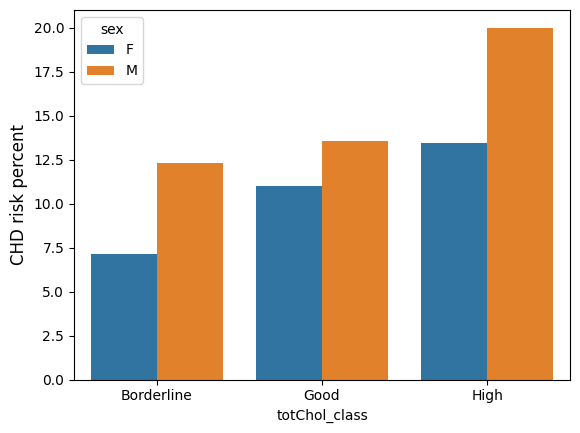

In [30]:
plot_visual(data,col='TenYearCHD',column_name1='sex',column_name2='totChol_class')

***Single variant analysis***


In the single variant analysis we will visualized the distribution of different columns which are associated to the data.

<Axes: xlabel='age', ylabel='Count'>

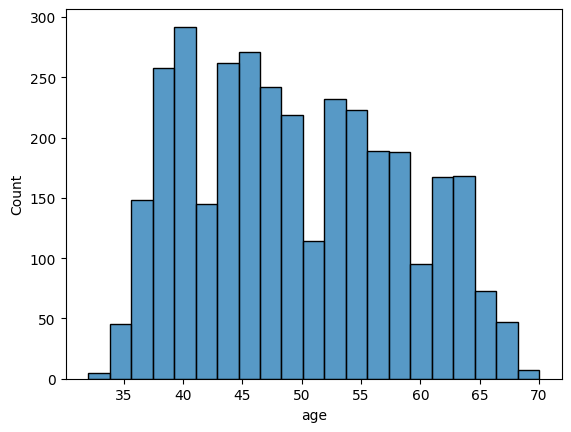

In [31]:
sns.histplot(data["age"])

<Axes: xlabel='cigsPerDay', ylabel='Count'>

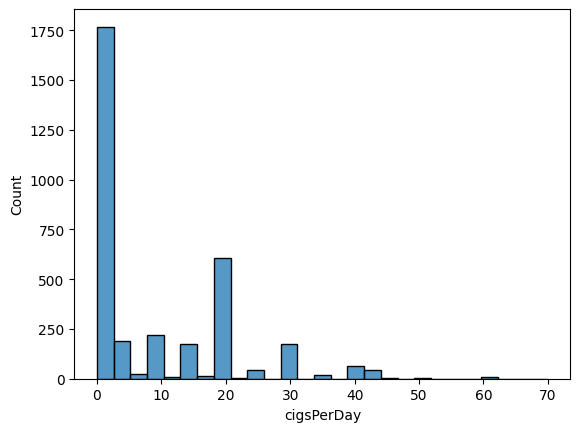

In [32]:
sns.histplot(data["cigsPerDay"])

<Axes: xlabel='heartRate', ylabel='Count'>

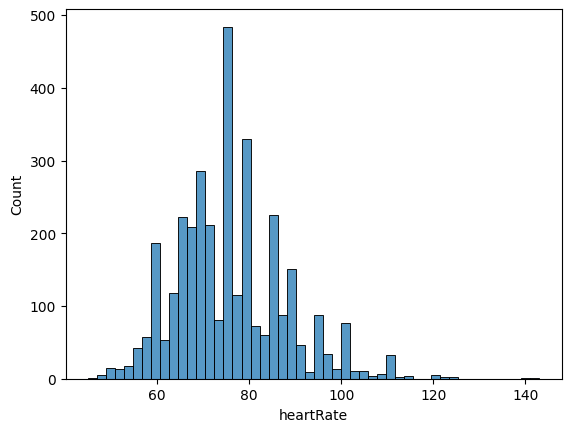

In [33]:
sns.histplot(data["heartRate"])

<Axes: xlabel='glucose', ylabel='Count'>

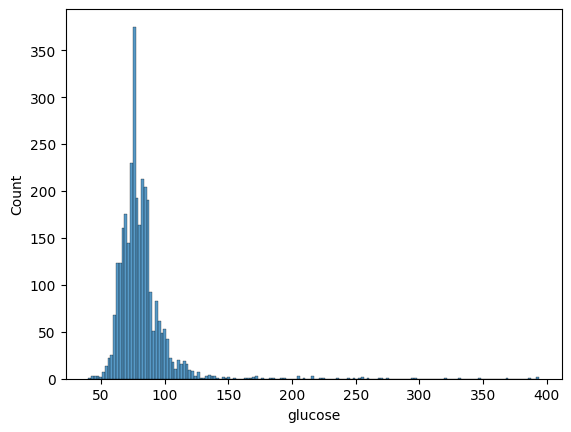

In [34]:
sns.histplot(data["glucose"])

<Axes: xlabel='BMI', ylabel='Count'>

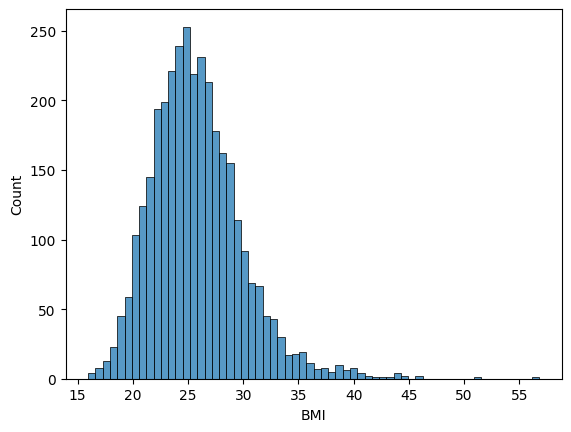

In [35]:
sns.histplot(data["BMI"])

<Axes: xlabel='totChol', ylabel='Count'>

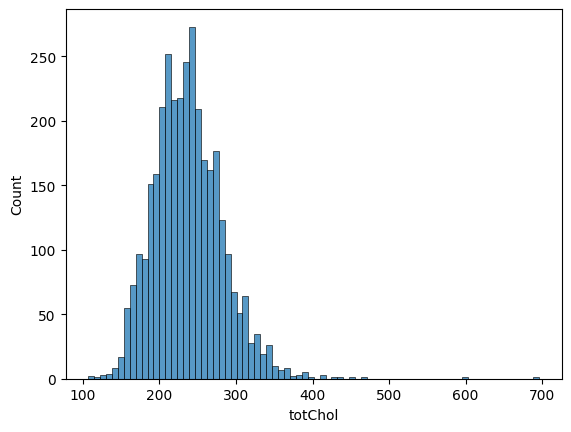

In [36]:
sns.histplot(data["totChol"])

<Axes: xlabel='diaBP', ylabel='Count'>

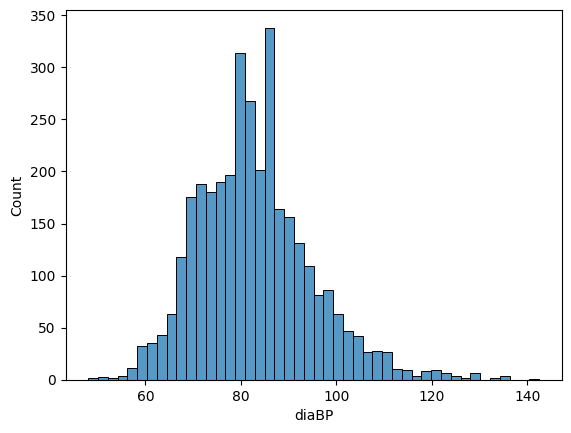

In [37]:
sns.histplot(data["diaBP"])

<Axes: xlabel='sysBP', ylabel='Count'>

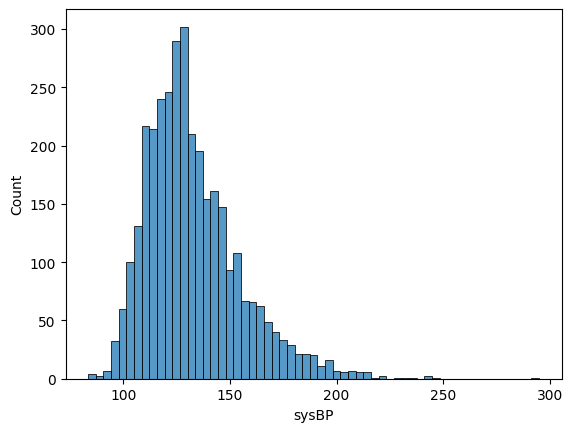

In [38]:
sns.histplot(data["sysBP"])

<Axes: xlabel='TenYearCHD', ylabel='Count'>

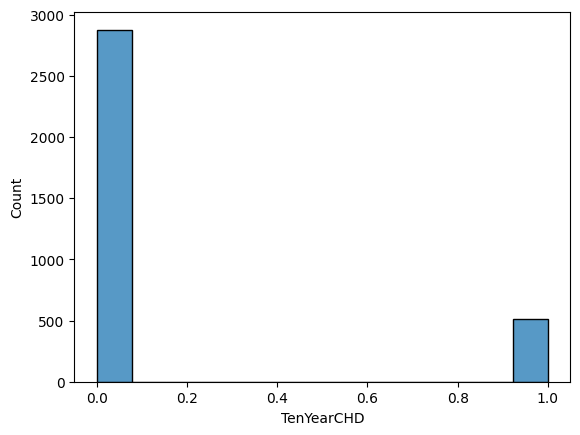

In [39]:
sns.histplot(data['TenYearCHD'])

In [40]:
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

From this single variant analysis it clear that most of the column in the dataset approximately follows the normal distribution except **cigsPerDay** and **glucose** column which follows left skewed distribution.

<Axes: xlabel='colunas', ylabel='valores'>

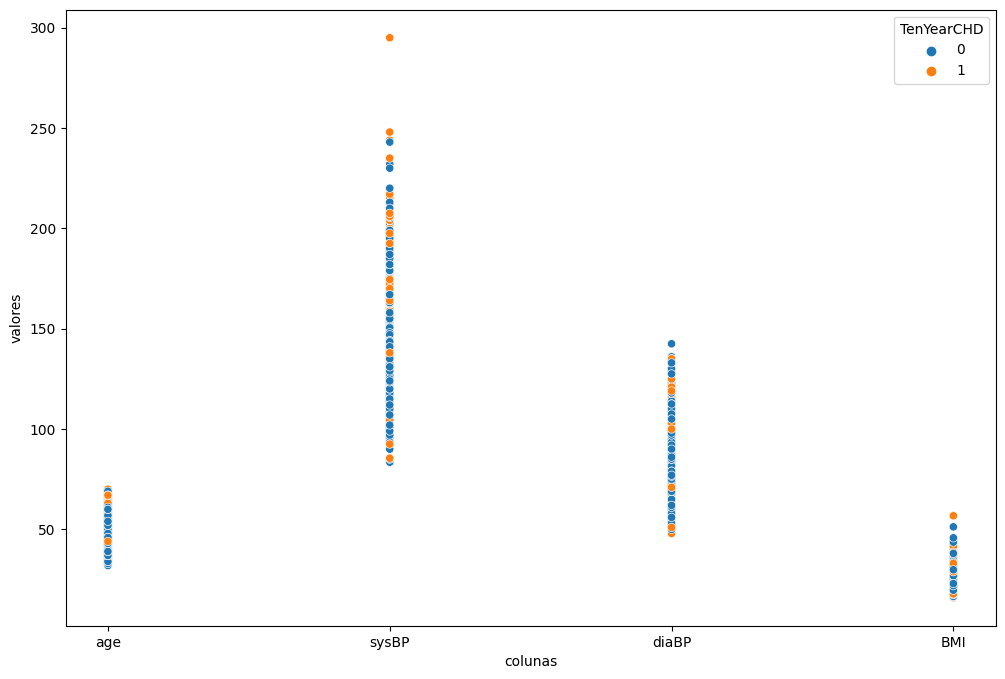

In [41]:
df = pd.melt(data,id_vars='TenYearCHD', value_vars=['age', 'sysBP', 'diaBP', 'BMI'], var_name='colunas', value_name='valores', col_level=None)
plt.figure(figsize=(12,8))
sns.scatterplot(x='colunas', y='valores', hue='TenYearCHD', data=df)

0 = No CHD 1 = CHD


<Figure size 1400x700 with 0 Axes>

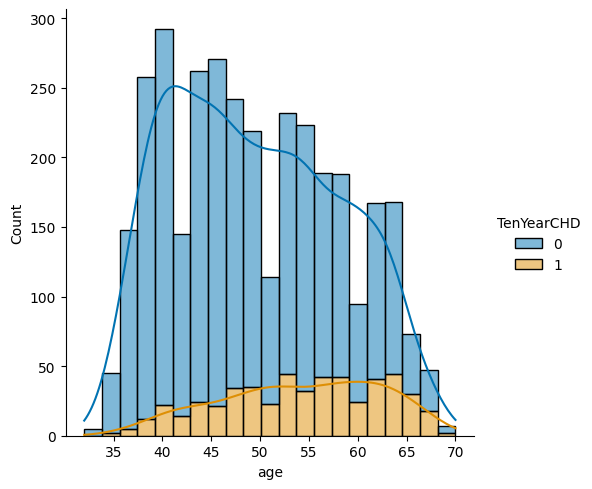

In [42]:
plt.figure(figsize = (14,7))
sns.displot(x='age', hue='TenYearCHD', data = data, kde=True,multiple="stack", palette = 'colorblind');
print ("0 = No CHD", "1 = CHD" )

0 = No CHD 1 = CHD


<Figure size 1400x700 with 0 Axes>

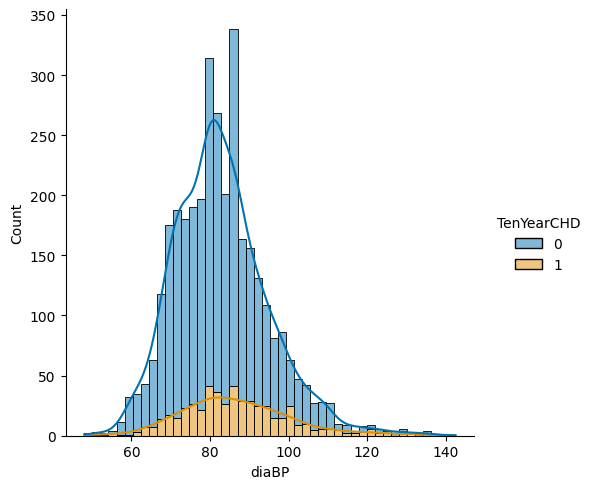

In [43]:
plt.figure(figsize = (14,7))
sns.displot(x="diaBP", hue='TenYearCHD', data = data, kde=True,multiple="stack", palette = 'colorblind')
print ("0 = No CHD", "1 = CHD" )


In [44]:
list_column=['is_smoking','prevalentHyp_', 'diabetes_','BMI_status', 'heartrate_class', 'totChol_class']
data.drop(list_column, inplace=True,axis=1)

# **Preprocessing**


For checking sknewness df.skew() method is used:

If the value is greater than zero then it is right skewed while the value is lesser than zero then it is left skewed.

In [45]:
# df.skew() method is used to check the skewness in a column and a dictionary is created, with column name as key while value as skewness in the corresponding column

col=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']
col_skewness=[]

for i in col:
  col_skewness.append(data[i].skew())
  
skew_dict=dict(zip(col,col_skewness))

In [46]:
# For Right skew, Log1p transformation where for left skew, square transformation is used
for i in skew_dict.keys():
  if -0.2<=skew_dict.get(i)<=0.2:
    pass
  elif skew_dict.get(i)>0.2:
    data[i]=np.log1p(data[i])
  else:
    data[i]=np.square(data[i]) 

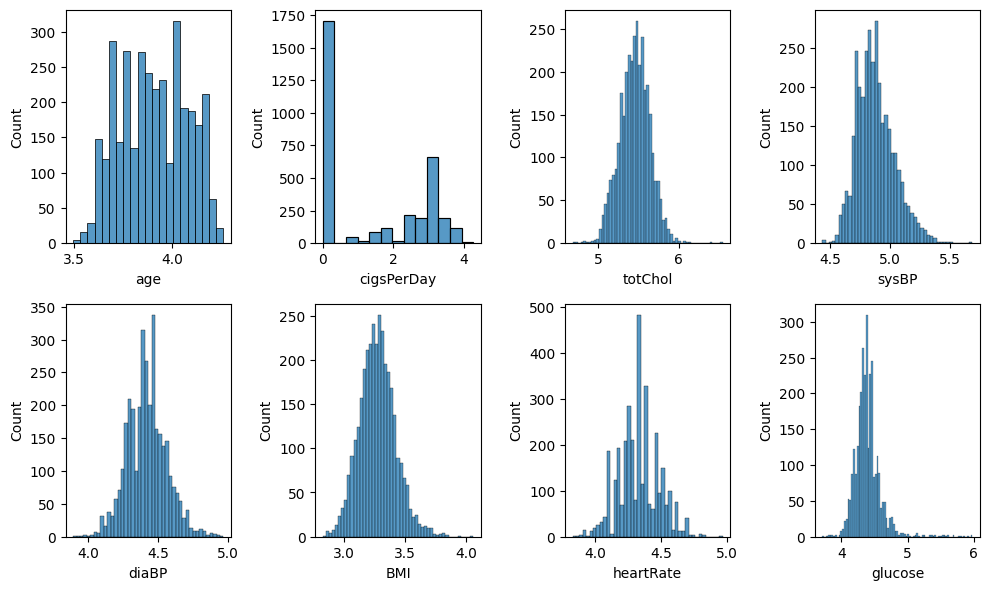

In [47]:
# Now checking whether each column data is transform into normal distribution or not
list_=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
num_cols = 4
num_rows = len(list_) // num_cols 

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3*num_rows))

for i, col in enumerate(list_):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=data, x=list_[i], ax=axs[row, col])

plt.tight_layout()
plt.show()

#2. Outlier detection

What Outlier is?

‘In statistics, an Outlier is an observation point that is distant from other observations.’

* Outliers are detected with the help of Visualization Technique — Box Plot. 

* The IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data. 
* It is a measure of the dispersion like a standard deviation or variance but is much more robust against outliers.

 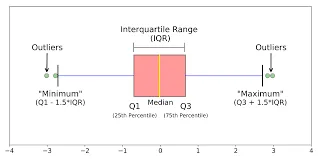


* list_  is a list of columns in a dataframe where column are numeric column.
* we have plot boxplot for those columns inorder to visualize the outlier which may present for those columns.

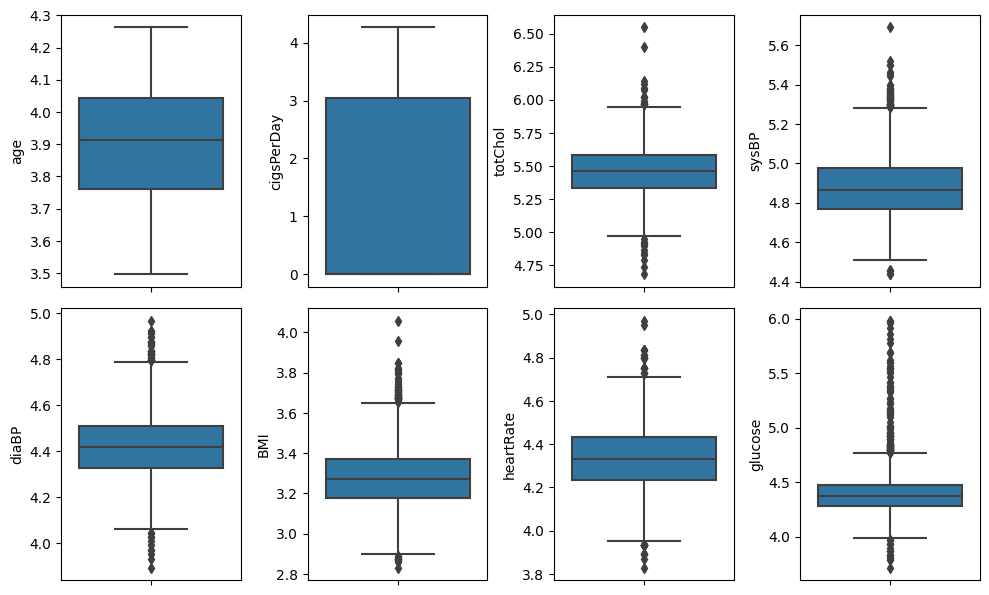

In [48]:
list_=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
num_cols = 4
num_rows = len(list_) // num_cols 

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 3*num_rows))

for i, col in enumerate(list_):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data, y=list_[i], ax=axs[row, col])

plt.tight_layout()
plt.show()

### ***Outliers removal***

* To overcome the negative impacts of
outliers and missing values, author proposed a technique called treatment of outlier data as missing values by applying
imputation methods (TOMI) instead of the classical method by removing these outliers.

  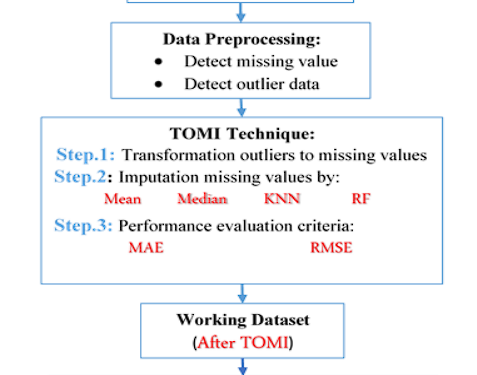

  citation: Muhammad Metwally Seliem. (2022). HandlingOutlier Data as Missing Values by Imputation Methods: Application of Machine Learning Algorithms. Turkish Journal of Computer and Mathematics Education (TURCOMAT), 13(1), 273–286. https://turcomat.org/index.php/turkbilmat/article/view/12054


In [49]:
# Define function for the calculation of maximum and minimum value for column based on percentile method 
def outlier_(dataframe):
  percentile_25=dataframe.quantile(0.25)
  percentile_75=dataframe.quantile(0.75)
  iqr=percentile_75-percentile_25
  max=percentile_75+1.5*iqr
  min=percentile_25-1.5*iqr
  dataframe=np.where(dataframe>max,np.nan,np.where(dataframe<min,np.nan,dataframe))
  return dataframe;

In [50]:
data_outlier_removed=pd.DataFrame(outlier_(data))
data_outlier_removed.columns=data.columns

<ipython-input-49-2902e0342ee2>:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataframe=np.where(dataframe>max,np.nan,np.where(dataframe<min,np.nan,dataframe))


In [51]:
# Function to change the data type of columns 
def change_dtype(data):
  for i in data.columns:
    if i=='sex':
      data[i]=data[i].astype('str')
    else:
      data[i]=data[i].astype('float')
  return data
data_outlier_removed=change_dtype(data_outlier_removed)

### Imputation of missing values 

* list_col_imp is a list of columns for imputation is required.
* KNN imputation technique is used to impute the missing values in the dataset.
* The KNNImputer provides imputation for filling in missing values using the k-Nearest Neighbors approach.

In [52]:
list_col_imp=['age','cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp','diabetes',
              'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
              
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit(data_outlier_removed[list_col_imp])

KNNImputer(n_neighbors=2)

In [53]:
data_outlier_removed[list_col_imp]=imputer.transform(data_outlier_removed[list_col_imp])

In [54]:
# Now check for null values
data_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   sex              3390 non-null   object 
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   float64
 4   prevalentStroke  3390 non-null   float64
 5   prevalentHyp     3390 non-null   float64
 6   diabetes         3390 non-null   float64
 7   totChol          3390 non-null   float64
 8   sysBP            3390 non-null   float64
 9   diaBP            3390 non-null   float64
 10  BMI              3390 non-null   float64
 11  heartRate        3390 non-null   float64
 12  glucose          3390 non-null   float64
 13  TenYearCHD       3364 non-null   float64
dtypes: float64(13), object(1)
memory usage: 370.9+ KB


In [55]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
encoder = OrdinalEncoder()

# fit the encoder to the data
encoder.fit(data_outlier_removed[['sex']])

# transform the data using the encoder
data_outlier_removed['sex']=encoder.transform(data_outlier_removed[['sex']])

In [56]:
data_outlier_removed.columns

Index(['age', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD'],
      dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
par_col=['age', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
         'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
X = data_outlier_removed[par_col]
y = data.TenYearCHD

# Split the dataset into training and testing sets, with 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [58]:
from sklearn.compose import ColumnTransformer

col_trans=ColumnTransformer(transformers=[('op3',StandardScaler(),par_col)],remainder='passthrough')

In [59]:
x_train=col_trans.fit_transform(X_train)

x_test=col_trans.transform(X_test)

# Imbalance in target column






---



---


Imbalanced data is data in which observed frequencies are very different across the different possible values of a categorical variable.

---



---



In [60]:
def chk_imb_prt(data):
  # x represent count of positive class
  x=data[data==1].value_counts()

  imb_prt = round(x /data.shape[0] * 100 , 2)

  sns.countplot(x=data)
  
  print('Imbalance percent in data is equal to : ')
  
  return imb_prt

chk_imb_prt(data['TenYearCHD'])

Imbalance percent in data is equal to : 


1    15.07
Name: TenYearCHD, dtype: float64

* Here 0 represent negative class and 1 represent positive class

* There is only 15.07% of positive class which means that for every 100 entries there is 15.07 positive class entries.
* Thus data is imbalance, therefore to make model efficient we have removed the imbalance from the data. Otherwise it will more biased towards negative class.


Methods to counteract class imbalance:


1.   Undersampling
2.   Oversampling
3.   Data Augmentation
4.   SMOTE (Synthetic Minority Oversampling Technique)
5.   Assign higher weights to the minority class



In [61]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_outlier_removed, test_size = 0.2, stratify=data.TenYearCHD)

In [62]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)


In [63]:
y_train.value_counts()

0    2015
1     358
Name: TenYearCHD, dtype: int64

In [65]:
!git commit -a

fatal: not a git repository (or any of the parent directories): .git
